In [1]:
import numpy as np
import pandas as pd

oneplus = pd.read_csv("One_Plus.csv")
#oneplus = pd.read_excel("One_Plus.xlsx")
oneplus


,Srl #,Product,Purchase date,Bill no.,Customer,Rating
0,1,One plus 7,01-05-2022,1,Suresh,8.3
1,2,One plus 7,01-04-2022,2,Ramesh,7.5
2,3,One plus 7,01-03-2022,3,Priya,7.9
3,4,One plus 5,14-02-2022,4,Pooja,8.5
4,5,One plus 5,12-01-2022,5,Twinkle,6.5
5,6,One plus 7,16-03-2022,6,Ranjani,8.3
6,7,One plus 7,01-03-2022,7,Himayat,7.5
7,8,One plus 7,27-01-2022,8,Gokul,7.9
8,9,One plus 7,31-03-2022,9,Ajay,8.5
9,10,One plus 7,16-03-2022,10,Pandurang,6.5


In [35]:
oneplus['Customer'] = np.where( oneplus["Customer"] == "Kohli", "Ramesh", oneplus['Customer'] )

#df["gender"] = np.where(oneplus["gender"] == "female", 0, 1)

In [6]:
oneplus.dtypes

Srl #              int64
Product           object
Purchase date     object
Bill no.           int64
Customer          object
Rating           float64
dtype: object

In [7]:
oneplus.describe()

,Srl #,Bill no.,Rating
count,40.000000,40.000000,40.000000
mean,20.500000,20.500000,7.067500
std,11.690452,11.690452,1.483134
min,1.000000,1.000000,4.800000
25%,10.750000,10.750000,6.000000
50%,20.500000,20.500000,7.150000
75%,30.250000,30.250000,8.300000
max,40.000000,40.000000,10.000000


In [5]:
oneplus.shape

(40, 6)

In [37]:
oneplus['Customer'].value_counts()

# Customers who have purchased most products

Ramesh       6
Ranjani      4
Suresh       4
Pooja        4
Twinkle      4
Priya        4
Ajay         3
Himayat      3
Pandurang    3
Gokul        3
Bumrah       2
Name: Customer, dtype: int64

In [39]:
product_count = oneplus.groupby('Product')['Customer'].count()
product_count_df = pd.DataFrame(product_count)
product_count_df.reset_index(inplace=True)
product_count_df.columns = ['Product', 'Customers_who_bought_this_item']
product_count_df = product_count_df.sort_values(by='Customers_who_bought_this_item', ascending=False)
product_count_df

,Product,Customers_who_bought_this_item
4,One plus Nerd,10
2,One plus 7,9
0,One Plus 7 Pro,8
1,One plus 5,8
3,One plus 8,5


In [40]:
product_count_df['Rank'] = product_count_df['Customers_who_bought_this_item'].rank(method='dense', ascending=False)
product_count_df.head(10)

,Product,Customers_who_bought_this_item,Rank
4,One plus Nerd,10,1.0
2,One plus 7,9,2.0
0,One Plus 7 Pro,8,3.0
1,One plus 5,8,3.0
3,One plus 8,5,4.0


In [41]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

#### Set the rating scale from 1 to 10
reader = Reader(rating_scale=(1, 10))

In [38]:
oneplus['Product'].value_counts()

# Products which has been sold most

One plus Nerd     10
One plus 7         9
One plus 5         8
One Plus 7 Pro     8
One plus 8         5
Name: Product, dtype: int64

In [2]:
reco_one = oneplus.groupby('Product')[['Rating']].mean()

In [3]:
reco_one

,Rating
Product,
One Plus 7 Pro,6.850000
One plus 5,7.125000
One plus 7,7.544444
One plus 8,6.520000
One plus Nerd,7.040000


In [6]:
reco_one['Rating_counts'] = pd.DataFrame(oneplus.groupby('Product')['Rating'].count())

In [7]:
reco_one.sort_values(by=['Rating','Rating_counts'], ascending=False).head(10)

,Rating,Rating_counts
Product,,
One plus 7,7.544444,9
One plus 5,7.125000,8
One plus Nerd,7.040000,10
One Plus 7 Pro,6.850000,8
One plus 8,6.520000,5


In [8]:
n_rating = len(oneplus["Rating"])
n_phones = len(oneplus['Product'].unique())
n_cust = len(oneplus['Customer'].unique())
  
print(f"Number of Ratings: {n_rating}")
print(f"Number of unique phones: {n_phones}")
print(f"Number of unique customers: {n_cust}")
print(f"Average rating per customer: {round(n_rating/n_cust, 2)}")
print(f"Average rating per phone: {round(n_rating/n_phones, 2)}")
  
cust_freq = oneplus[['Customer', 'Product']].groupby('Customer').count().reset_index()

cust_freq.head()


Number of Ratings: 40
Number of unique phones: 5
Number of unique customers: 12
Average rating per customer: 3.33
Average rating per phone: 8.0


,Customer,Product
0,Ajay,3
1,Bumrah,2
2,Gokul,3
3,Himayat,3
4,Kohli,2


In [9]:
cust_freq.columns = ['Customer', 'n_rating']

In [10]:
cust_freq.head()

,Customer,n_rating
0,Ajay,3
1,Bumrah,2
2,Gokul,3
3,Himayat,3
4,Kohli,2


In [20]:
reco_cust = oneplus.groupby('Customer')[['Rating']].mean()

In [21]:
reco_cust['Cust_Rating'] = pd.DataFrame(oneplus.groupby('Customer')['Rating'].count())

In [22]:
reco_cust

,Rating,Cust_Rating
Customer,,
Ajay,7.666667,3
Bumrah,7.250000,2
Gokul,6.733333,3
Himayat,8.166667,3
Kohli,6.650000,2
Pandurang,6.100000,3
Pooja,7.875000,4
Priya,7.400000,4
Ramesh,6.700000,4


In [23]:
reco_cust.sort_values(by=['Rating','Cust_Rating'], ascending=False).head(10)

,Rating,Cust_Rating
Customer,,
Himayat,8.166667,3
Pooja,7.875000,4
Ajay,7.666667,3
Ranjani,7.500000,4
Priya,7.400000,4
Bumrah,7.250000,2
Gokul,6.733333,3
Ramesh,6.700000,4
Kohli,6.650000,2


In [24]:
oneplus_small = oneplus[['Product','Customer','Rating']]

In [25]:
oneplus_small

,Product,Customer,Rating
0,One plus 7,Suresh,8.3
1,One plus 7,Ramesh,7.5
2,One plus 7,Priya,7.9
3,One plus 5,Pooja,8.5
4,One plus 5,Twinkle,6.5
5,One plus 7,Ranjani,8.3
6,One plus 7,Himayat,7.5
7,One plus 7,Gokul,7.9
8,One plus 7,Ajay,8.5
9,One plus 7,Pandurang,6.5


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mobile Ratings', ylabel='Density'>

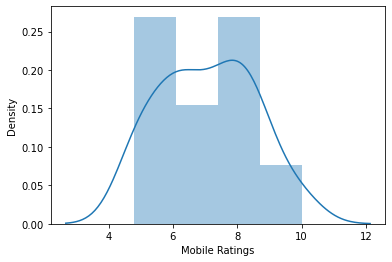

In [27]:
import seaborn as sns

x = pd.Series(oneplus_small['Rating'], name="Mobile Ratings")
sns.distplot(x)

<AxesSubplot:xlabel='Rating'>

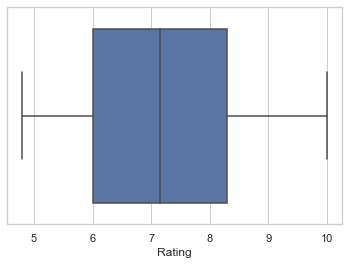

In [28]:
sns.set(style="whitegrid")
sns.boxplot(x=oneplus_small['Rating'])

In [29]:
#Find the total number of unique users, items ids and the ratings...
oneplus_small.nunique()

Product      5
Customer    12
Rating      14
dtype: int64

In [42]:
data = Dataset.load_from_df(oneplus_small[['Customer', 'Product', 'Rating']], reader)

In [44]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2,random_state=123)

In [46]:
trainset.n_ratings

32

In [49]:
len(testset)

8

In [50]:
from surprise import SVD
from surprise import accuracy

In [51]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [52]:
test_pred = svd_model.test(testset)

In [53]:
test_pred

[Prediction(uid='Kohli', iid='One Plus 7 Pro', r_ui=7.3, est=1, details={'was_impossible': False}),
 Prediction(uid='Bumrah', iid='One Plus 7 Pro', r_ui=8.5, est=1, details={'was_impossible': False}),
 Prediction(uid='Suresh', iid='One plus Nerd', r_ui=7.9, est=2.718917147566197, details={'was_impossible': False}),
 Prediction(uid='Pandurang', iid='One plus 8', r_ui=4.8, est=1, details={'was_impossible': False}),
 Prediction(uid='Gokul', iid='One plus 8', r_ui=7.3, est=1, details={'was_impossible': False}),
 Prediction(uid='Suresh', iid='One Plus 7 Pro', r_ui=4.8, est=1.6052341793288183, details={'was_impossible': False}),
 Prediction(uid='Himayat', iid='One plus Nerd', r_ui=10.0, est=3.615958723054148, details={'was_impossible': False}),
 Prediction(uid='Priya', iid='One plus 7', r_ui=7.9, est=3.905625654949944, details={'was_impossible': False})]

In [54]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])
test_pred_df.head()

,0,1,2
0,Kohli,One Plus 7 Pro,1.000000
1,Bumrah,One Plus 7 Pro,1.000000
2,Suresh,One plus Nerd,2.718917
3,Pandurang,One plus 8,1.000000
4,Gokul,One plus 8,1.000000


In [55]:
test_pred_df.columns = ["Customer","Product","Rating"]
test_pred_df.sort_values(by = ["Customer", "Rating"],ascending=False,inplace=True)

In [56]:
test_pred_df.head()

,Customer,Product,Rating
2,Suresh,One plus Nerd,2.718917
5,Suresh,One Plus 7 Pro,1.605234
7,Priya,One plus 7,3.905626
3,Pandurang,One plus 8,1.000000
0,Kohli,One Plus 7 Pro,1.000000


In [57]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 5.5208


5.520769393921182

In [58]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [59]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [60]:
test_pred_knn = algo.test(testset)

In [62]:
test_pred_knn_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred_knn])
test_pred_knn_df.head()

,0,1,2
0,Kohli,One Plus 7 Pro,6.840000
1,Bumrah,One Plus 7 Pro,6.840000
2,Suresh,One plus Nerd,6.562500
3,Pandurang,One plus 8,6.833333
4,Gokul,One plus 8,6.833333


In [63]:
test_pred_knn_df.columns = ["Customer","Product","pred_Rating"]
test_pred_knn_df.sort_values(by = ["Customer", "pred_Rating"],ascending=False,inplace=True)

In [64]:
test_pred_knn_df.head()

,Customer,Product,pred_Rating
2,Suresh,One plus Nerd,6.562500
5,Suresh,One Plus 7 Pro,6.240000
7,Priya,One plus 7,6.805178
3,Pandurang,One plus 8,6.833333
0,Kohli,One Plus 7 Pro,6.840000


In [65]:
# compute RMSE
accuracy.rmse(test_pred_knn)

RMSE: 1.7391


1.7391438153557484

In [66]:
top_5_recos = test_pred_knn_df.groupby("Customer").head(5).reset_index(drop=True)

In [68]:
test_pred_knn_df

,Customer,Product,pred_Rating
2,Suresh,One plus Nerd,6.562500
5,Suresh,One Plus 7 Pro,6.240000
7,Priya,One plus 7,6.805178
3,Pandurang,One plus 8,6.833333
0,Kohli,One Plus 7 Pro,6.840000
6,Himayat,One plus Nerd,6.562500
4,Gokul,One plus 8,6.833333
1,Bumrah,One Plus 7 Pro,6.840000


In [67]:
top_5_recos

,Customer,Product,pred_Rating
0,Suresh,One plus Nerd,6.562500
1,Suresh,One Plus 7 Pro,6.240000
2,Priya,One plus 7,6.805178
3,Pandurang,One plus 8,6.833333
4,Kohli,One Plus 7 Pro,6.840000
5,Himayat,One plus Nerd,6.562500
6,Gokul,One plus 8,6.833333
7,Bumrah,One Plus 7 Pro,6.840000


In [17]:
!pip install texthero



In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
product_tf = oneplus_small['tfidf']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab

oneplus_small['cust_new_tf'] = vectorizer.fit(oneplus_small['Customer_clean'])
oneplus_small['prod_new_tf'] = vectorizer.fit(oneplus_small['Product_clean'])

#vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'suresh': 10, 'ramesh': 8, 'priya': 7, 'pooja': 6, 'twinkle': 11, 'ranjani': 9, 'himayat': 3, 'gokul': 2, 'ajay': 0, 'pandurang': 5, 'kohli': 4, 'bumrah': 1}
[3.32727771 3.61495978 3.32727771 3.32727771 3.61495978 3.32727771
 3.10413415 3.10413415 3.10413415 3.10413415 3.10413415 3.10413415]


In [33]:
oneplus_small['prod_new_tf'] = vectorizer.fit_transform(oneplus_small['Product_clean'])

#vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'one': 1, 'plus': 2, 'nerd': 0, 'pro': 3}
[2.31567679 1.         1.         2.51634749]


In [36]:
oneplus_small['prod_new_tf']

0       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
1       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
2       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
3       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
4       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
5       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
6       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
7       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
8       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
9       (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
10      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
11      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
12      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
13      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
14      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
15      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
16      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.7071...
17      (0, 2)\t0.7071067811865475\n  (0, 1)\t0.

In [52]:
np.max(oneplus_small.tfidf.values)

[0.8717578384453577,
 0.0,
 0.0,
 0.0,
 0.34643778020668986,
 0.34643778020668986,
 0.0]

In [53]:
np.max(oneplus_small.cust_tfidf.values)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [59]:
shape=(np.max(oneplus_small.tfidf.values), np.max(oneplus_small.cust_tfidf.values))

In [60]:
shape

([0.8717578384453577,
  0.0,
  0.0,
  0.0,
  0.34643778020668986,
  0.34643778020668986,
  0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [61]:
ratings_mat = np.ndarray(shape,dtype=np.uint8)

TypeError: 'list' object cannot be interpreted as an integer

In [28]:
ratings_mat = np.ndarray(
    shape=(np.max(oneplus_small.tfidf.values), np.max(oneplus_small.cust_tfidf.values)),
    dtype=np.uint8)

TypeError: 'list' object cannot be interpreted as an integer

In [22]:
# Creating the rating matrix (rows as phones, columns as users)

ratings_mat = np.ndarray(
    shape=(np.max(oneplus_small.tfidf.values), np.max(oneplus_small.cust_tfidf.values)),
    dtype=np.uint8)
ratings_mat[oneplus_small.tfidf.values-1, oneplus_small.cust_tfidf.values-1] = oneplus_small.Rating.values

#Normalizing the matrix(subtract mean off)
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

#Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)


TypeError: 'list' object cannot be interpreted as an integer

In [23]:
ratings_mat

NameError: name 'ratings_mat' is not defined

In [ ]:
#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 50
movie_id = 10 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movie_data, movie_id, indexes)

In [18]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
oneplus_small['Cust-vect'] = vectorizer.fit_transform(oneplus_small['Customer'])
vectorizer.get_feature_names_out()

<ipython-input-29-ae70cf906e7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneplus_small['Cust-vect'] = vectorizer.fit_transform(oneplus_small['Customer'])


array(['ajay', 'bumrah', 'gokul', 'himayat', 'kohli', 'pandurang',
       'pooja', 'priya', 'ramesh', 'ranjani', 'suresh', 'twinkle'],
      dtype=object)

In [32]:
oneplus_small['C1'] = oneplus_small['Cust-vect'].todense()

AttributeError: 'Series' object has no attribute 'todense'

In [25]:
data = Dataset.load_from_df(oneplus_small[['Customer', 'Product', 'rating_scale']], reader=Reader)

AttributeError: 'DatasetAutoFolds' object has no attribute 'head'

In [26]:
train_data, test_data = train_test_split(data, test_size = 0.20, random_state=612)

AttributeError: type object 'Reader' has no attribute 'rating_scale'